<a href="https://colab.research.google.com/github/karthikmandelli/frugal-labs-/blob/main/rnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess the dataset
dataset = pd.read_excel('/content/last excel temperature yyy-mm-dd.xlsx')
dataset



,DATE,Maxtemperature,MinTemperature,Maxhumidity,Minhumidity,rainfall
0,2021-01-01,29.0,20.0,96.0,90.0,0.000000
1,2021-01-02,30.0,19.0,98.0,84.0,0.000000
2,2021-01-03,31.0,19.0,99.0,92.0,0.000000
3,2021-01-04,20.0,20.0,98.0,89.0,0.059055
4,2021-01-05,19.0,18.0,97.0,86.0,0.000000
...,...,...,...,...,...,...
876,2023-05-27,31.0,22.0,60.0,NaN,0.000000
877,2023-05-28,30.0,22.0,63.0,NaN,0.000000
878,2023-05-29,29.0,22.0,60.0,NaN,1.098425
879,2023-05-30,30.0,20.0,65.0,NaN,0.598425


In [31]:
dataset = dataset.drop(columns="Minhumidity")  # Remove any rows with missing values

In [32]:
dataset.fillna(method="ffill",inplace=True)

In [33]:

# Select the target variable and the first 800 rows for training
target_variable = 'Maxtemperature'
train_data = dataset[target_variable].values[:800].reshape(-1, 1)

# Feature scaling
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)

# Create sequences and corresponding target values
sequence_length = 10  # Adjust this value as needed
X_train = []
y_train = []
for i in range(len(train_data) - sequence_length):
    X_train.append(train_data[i:i+sequence_length])
    y_train.append(train_data[i+sequence_length])
X_train = np.array(X_train)
y_train = np.array(y_train)

# Build the RNN model
model = Sequential()
model.add(LSTM(units=50, input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Save the model for future use
model.save('rnn_model.h5')


Epoch 1/50
25/25 [==============================] - 3s 8ms/step - loss: 0.1327
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0055
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 8/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 9/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 10/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 11/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 12/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 13/50
25/25 [==============================

Epoch 1/50
20/20 [==============================] - 1s 58ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 2/50
20/20 [==============================] - 0s 15ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 3/50
20/20 [==============================] - 0s 14ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 4/50
20/20 [==============================] - 0s 13ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 5/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 6/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 7/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 8/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 9/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 10/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 11/50
2

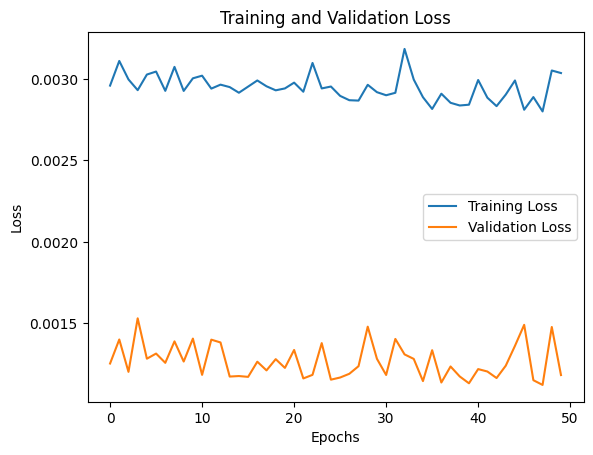

In [34]:
import matplotlib.pyplot as plt

# Train the model and collect the loss values
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


3/3 [==============================] - 0s 5ms/step


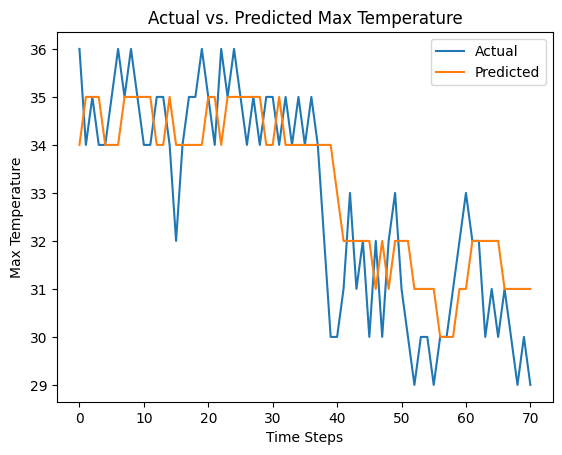

In [57]:
# Load and preprocess the test dataset
test_data = dataset[target_variable].values[800:].reshape(-1, 1)
test_data = scaler.transform(test_data)

# Create sequences for the test dataset
X_test = []
y_test = []
for i in range(len(test_data) - sequence_length):
    X_test.append(test_data[i:i+sequence_length])
    y_test.append(test_data[i+sequence_length])
X_test = np.array(X_test)
y_test = np.array(y_test)

# Perform predictions on the test dataset
y_pred = model.predict(X_test)

# Inverse transform the scaled data to obtain the actual values
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred = y_pred.round().astype(int)
# Plot the actual values and predicted values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Max Temperature')
plt.title('Actual vs. Predicted Max Temperature')
plt.legend()
plt.show()


In [58]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")


RMSE: 1.3215441245904114
R2 Score: 0.6435338893837558


In [55]:
# Load and preprocess the test dataset
test_dates = dataset['DATE'].values[800+sequence_length:]  # Assuming 'Date' is the column name for dates
test_data = dataset[target_variable].values[800:].reshape(-1, 1)
test_data = scaler.transform(test_data)

# Perform predictions on the test dataset
y_pred = model.predict(X_test)

# Inverse transform the scaled data to obtain the actual values
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)
y_pred = y_pred.round().astype(int)
# Print the predicted values with dates for the test dataset
print("Predicted values for the test dataset:")
for i in range(len(y_pred)):
    print(f"Date: {test_dates[i]}, Predicted Value: {y_pred[i][0]}")


3/3 [==============================] - 0s 5ms/step
Predicted values for the test dataset:
Date: 2023-03-22T00:00:00.000000000, Predicted Value: 34
Date: 2023-03-23T00:00:00.000000000, Predicted Value: 35
Date: 2023-03-24T00:00:00.000000000, Predicted Value: 35
Date: 2023-03-25T00:00:00.000000000, Predicted Value: 35
Date: 2023-03-26T00:00:00.000000000, Predicted Value: 34
Date: 2023-03-27T00:00:00.000000000, Predicted Value: 34
Date: 2023-03-28T00:00:00.000000000, Predicted Value: 34
Date: 2023-03-29T00:00:00.000000000, Predicted Value: 35
Date: 2023-03-30T00:00:00.000000000, Predicted Value: 35
Date: 2023-03-31T00:00:00.000000000, Predicted Value: 35
Date: 2023-04-01T00:00:00.000000000, Predicted Value: 35
Date: 2023-04-02T00:00:00.000000000, Predicted Value: 35
Date: 2023-04-03T00:00:00.000000000, Predicted Value: 34
Date: 2023-04-04T00:00:00.000000000, Predicted Value: 34
Date: 2023-04-05T00:00:00.000000000, Predicted Value: 35
Date: 2023-04-06T00:00:00.000000000, Predicted Value: 3

In [59]:
import pandas as pd

# Create a dataframe with dates, original values, predicted values, and differences
results_df = pd.DataFrame({
    'Date': test_dates,
    'Original': dataset['Maxtemperature'].values[800+sequence_length:],
    'Predicted': y_pred.flatten(),
    'Difference': dataset['Maxtemperature'].values[800+sequence_length:] - y_pred.flatten()
})

# Print the dataframe
print(results_df)


         Date  Original  Predicted  Difference
0  2023-03-22      36.0         34         2.0
1  2023-03-23      34.0         35        -1.0
2  2023-03-24      35.0         35         0.0
3  2023-03-25      34.0         35        -1.0
4  2023-03-26      34.0         34         0.0
..        ...       ...        ...         ...
66 2023-05-27      31.0         31         0.0
67 2023-05-28      30.0         31        -1.0
68 2023-05-29      29.0         31        -2.0
69 2023-05-30      30.0         31        -1.0
70 2023-05-31      29.0         31        -2.0

[71 rows x 4 columns]


In [40]:
threshold = 3 # Set your desired threshold value

filtered_df = results_df[results_df['Difference'].abs() > threshold]

print(filtered_df)


         Date  Original  Predicted  Difference
39 2023-04-30      30.0         34        -4.0


In [41]:
filtered_df = results_df[(results_df['Difference'].abs() > 2) & (results_df['Difference'].abs() < 3)]

print(filtered_df)



Empty DataFrame
Columns: [Date, Original, Predicted, Difference]
Index: []


In [42]:
filtered_df = results_df[(results_df['Difference'].abs() > 1) & (results_df['Difference'].abs() < 2)]

print(filtered_df)


Empty DataFrame
Columns: [Date, Original, Predicted, Difference]
Index: []


In [60]:
filtered_df = results_df[(results_df['Difference'].abs() > 0.8)]

print(filtered_df)
print("length")
len(filtered_df)


         Date  Original  Predicted  Difference
0  2023-03-22      36.0         34         2.0
1  2023-03-23      34.0         35        -1.0
3  2023-03-25      34.0         35        -1.0
5  2023-03-27      35.0         34         1.0
6  2023-03-28      36.0         34         2.0
8  2023-03-30      36.0         35         1.0
10 2023-04-01      34.0         35        -1.0
11 2023-04-02      34.0         35        -1.0
12 2023-04-03      35.0         34         1.0
13 2023-04-04      35.0         34         1.0
14 2023-04-05      34.0         35        -1.0
15 2023-04-06      32.0         34        -2.0
17 2023-04-08      35.0         34         1.0
18 2023-04-09      35.0         34         1.0
19 2023-04-10      36.0         34         2.0
21 2023-04-12      34.0         35        -1.0
22 2023-04-13      36.0         34         2.0
24 2023-04-15      36.0         35         1.0
26 2023-04-17      34.0         35        -1.0
28 2023-04-19      34.0         35        -1.0
29 2023-04-20

53

To improve the performance of your regression model and aim for a higher R2 score, you can try the following approaches:

Adjust the model architecture:

Increase the number of LSTM units or add more layers to increase the model's capacity to capture complex patterns in the data.
Experiment with different activation functions in the LSTM layers, such as 'tanh' or 'relu', to find the one that works best for your data.
Consider adding regularization techniques, such as dropout or recurrent dropout, to prevent overfitting and improve generalization.
Tune hyperparameters:

Experiment with different values for hyperparameters such as the learning rate, batch size, and number of epochs.
Perform a grid search or use techniques like random search to systematically explore different combinations of hyperparameters and find the optimal configuration.
Feature engineering:

Analyze your dataset and consider if there are any additional features or transformations that could help improve the model's performance.
Explore including lagged or rolling features to capture temporal patterns.
Consider adding exogenous variables that may influence the target variable, such as holiday indicators or seasonal factors.
Train on more data:

If possible, increase the size of your training dataset to provide more examples for the model to learn from.
If collecting more data is not feasible, consider techniques like data augmentation or synthetic data generation to artificially increase the size of the training set.
Try different model architectures:

Apart from LSTM, consider trying other types of recurrent or non-recurrent architectures like GRU, ConvLSTM, or even feed-forward neural networks.
Ensemble models can also be effective, combining the predictions of multiple models to obtain a more robust and accurate result.
Remember to carefully validate the model's performance on a separate test dataset and monitor the changes in the evaluation metrics as you make modifications. Continuously iterate and experiment with different approaches until you achieve the desired improvement in the R2 score.




